### Importing libraries 

In [1008]:
import pandas as pd
import statistics
import numpy as np
import unidecode
import re
import matplotlib.pyplot as plt
import seaborn as sns 
import plotly.express as px
sns.set_style('darkgrid')

### Reading Files & Pre-processing 

In [1009]:
spam  =pd.read_csv(r"C:\Users\hornt\Documents\03.PROJECTS -\01. Datasets\P10.0spam.csv",encoding = 'latin')
print(spam.shape)
spam.head()

(5572, 5)


,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [1010]:
print(spam.columns)
spam[['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4']].isnull().sum()

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')


Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

<Axes: >

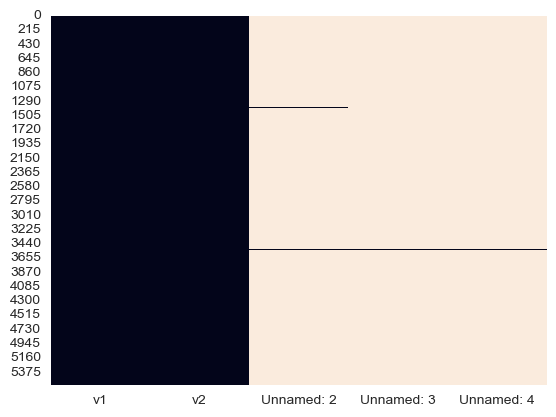

In [1011]:
sns.heatmap(spam.isnull(),cbar =False)

In [1012]:
d2 = spam[spam['Unnamed: 2'].notna()][['v1','Unnamed: 2']].rename(columns ={'Unnamed: 2' :'v2'})
d3 =  spam[spam['Unnamed: 3'].notna()][['v1','Unnamed: 3']].rename(columns ={'Unnamed: 3' :'v2'})
d4 =  spam[spam['Unnamed: 4'].notna()][['v1','Unnamed: 4']].rename(columns ={'Unnamed: 4' :'v2'})

In [1013]:
spam[spam['Unnamed: 3'].notna()][['v1','Unnamed: 3']].rename(columns ={'Unnamed: 3' :'v2'})

,v1,v2
95,spam,"MK17 92H. 450Ppw 16"""
281,ham,why to miss them
899,spam,"MK17 92H. 450Ppw 16"""
1038,ham,GE
2170,ham,"U NO THECD ISV.IMPORTANT TOME 4 2MORO\"""""
2255,ham,i wil tolerat.bcs ur my someone..... But
3145,ham,"ILLSPEAK 2 U2MORO WEN IM NOT ASLEEP...\"""""
3506,ham,"whoever is the KING\""!... Gud nyt"""
3525,ham,TX 4 FONIN HON
4668,ham,"\""OH No! COMPETITION\"". Who knew"


In [1014]:
print(spam.shape)
print(d2.shape)
print(d3.shape)
print(d4.shape)

(5572, 5)
(50, 2)
(12, 2)
(6, 2)


In [1015]:
print(spam.isnull().sum())
print('----------------------')
print(d2.isnull().sum())
print('----------------------')
print(d3.isnull().sum())
print('----------------------')
print(d4.isnull().sum())
print('----------------------')

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64
----------------------
v1    0
v2    0
dtype: int64
----------------------
v1    0
v2    0
dtype: int64
----------------------
v1    0
v2    0
dtype: int64
----------------------


In [1016]:
spam1  = pd.concat([spam,d2,d3,d4])
print(spam1.shape)
spam1 =spam1[['v1','v2']]
spam1.rename(columns ={'v1': 'Class','v2' :'Message'},inplace = True)
print(spam1.shape)


(5640, 5)
(5640, 2)


Class      0
Message    0
dtype: int64


<Axes: >

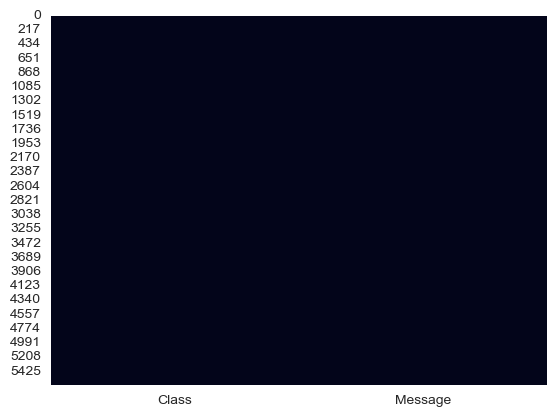

In [1017]:
print(spam1.isnull().sum())
sns.heatmap(spam1.isnull(),cbar =False)

### Exploratory Data Analysis 

#### Countplot of Categories (Ham-Spam) 

Class
ham     4886
spam     754
Name: count, dtype: int64


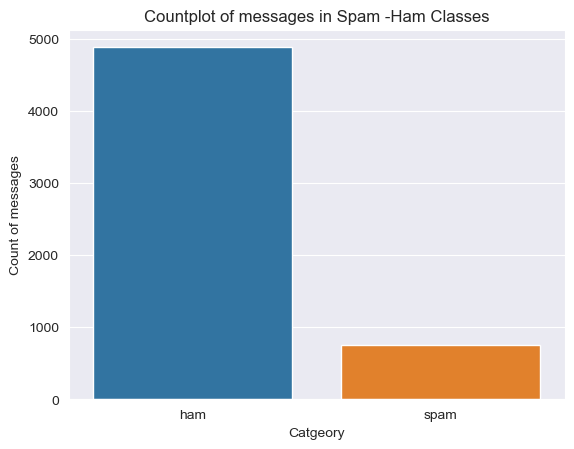

In [1018]:
sns.countplot(data =spam1, x =spam1['Class'])
plt.xlabel('Catgeory')
plt.ylabel('Count of messages')
plt.title('Countplot of messages in Spam -Ham Classes')
print(spam1['Class'].value_counts())
plt.show()

#### Histogram of Length of Characters in a message 

In [1019]:
msg_len = [len(spam1.iloc[i,:]['Message']) for i in range(len(spam1))]
spam1['Char_Len'] =msg_len
spam1.head()

,Class,Message,Char_Len
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [1020]:
ham_len = list(spam1[spam1['Class'] == 'ham']['Char_Len'])
ham_avg = np.median(ham_len)
spam_len = list(spam1[spam1['Class'] == 'spam']['Char_Len'])
spam_avg = np.median(spam_len)
print(f"Median len of ham messages:{round(ham_avg,2)}")
print(f"Median length of Spam Messages {round(spam_avg,2)}")

Median len of ham messages:52.0
Median length of Spam Messages 149.0


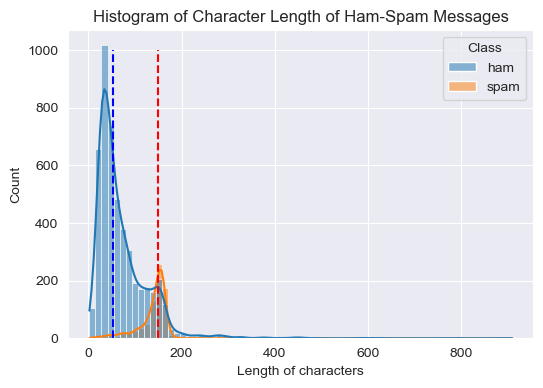

In [1021]:
##plt.vlines(colors = ("r", "g", "b"),linestyles = ("solid", "dashed", "dotted"))

plt.figure(figsize =(6,4))
sns.histplot(data =spam1, x =spam1['Char_Len'],hue ='Class',kde =True,bins =70)
plt.vlines(ham_avg,0,1000,colors ='b',linestyles ='dashed')
plt.vlines(spam_avg,0,1000,colors ='r',linestyles ='dashed')
plt.xlabel('Length of characters')
plt.title('Histogram of Character Length of Ham-Spam Messages')
plt.show()

#### Histogram of number of words in a message

In [1022]:
import spacy

In [1023]:
msg_list = [spam1.iloc[i,:]['Message'] for i in range(len(spam1))]
msg_list[0]

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [1025]:
word_len =[]
nlp = spacy.load("en_core_web_sm")
for i in msg_list:
    words =[]
    for token in nlp(i):
        words.append(token)
    word_len.append(len(words))
    

In [1026]:
print(spam1.shape[0],len(word_len))  
spam1['Word_Len'] = word_len

5640 5640


Median len of ham messages:13.0
Median length of Spam Messages 29.0


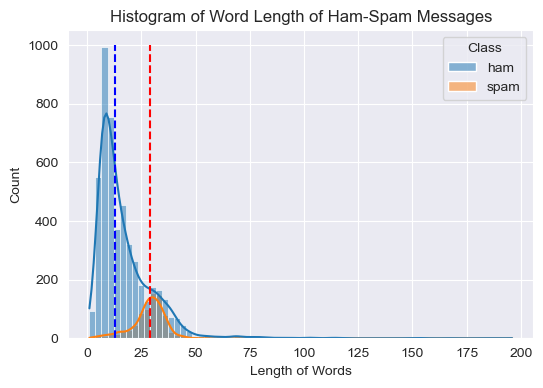

In [1027]:
ham_wl = list(spam1[spam1['Class'] == 'ham']['Word_Len'])
ham_wla = np.median(ham_wl)
spam_wl = list(spam1[spam1['Class'] == 'spam']['Word_Len'])
spam_wla =np.median(spam_wl)
print(f"Median len of ham messages:{round(ham_wla,2)}")
print(f"Median length of Spam Messages {round(spam_wla,2)}")


plt.figure(figsize =(6,4))
sns.histplot(data =spam1, x =spam1['Word_Len'],hue ='Class',kde =True,bins =70)
plt.vlines(ham_wla,0,1000,colors ='b',linestyles ='dashed')
plt.vlines(spam_wla,0,1000,colors ='r',linestyles ='dashed')
plt.xlabel('Length of Words')
plt.title('Histogram of Word Length of Ham-Spam Messages')
plt.show()

#### Word Cloud of Common words in Spam-Ham  

#### Count of POS (poper noun,  Verb) in Spam -Ham 

#### Word-Cloud & COuntplot of NER in Spam -Ham Class 

### Pre-Processing

#### Lowercasing

In [1028]:
spam1['Message'] =spam1['Message'].apply(lambda x :x.lower())

In [1029]:
spam1.head()

,Class,Message,Char_Len,Word_Len
0,ham,"go until jurong point, crazy.. available only ...",111,24
1,ham,ok lar... joking wif u oni...,29,8
2,spam,free entry in 2 a wkly comp to win fa cup fina...,155,31
3,ham,u dun say so early hor... u c already then say...,49,13
4,ham,"nah i don't think he goes to usf, he lives aro...",61,15


#### Removal of stopwords & Punctuation 

In [1030]:
!pip install nltk
import nltk
import spacy
import string

In [1031]:
print(list(string.punctuation))
print(len(list(string.punctuation)))

['!', '"', '#', '$', '%', '&', "'", '(', ')', '*', '+', ',', '-', '.', '/', ':', ';', '<', '=', '>', '?', '@', '[', '\\', ']', '^', '_', '`', '{', '|', '}', '~']
32


In [1032]:
extra_punct = [    ',', '.', '"', ':', ')', '(', '!', '?', '|', ';', "'", '$', '&', '/', '[', ']', '>', '%', '=', '#', '*', '+', '\\', '•',  '~', '@', '£',
    '·', '_', '{', '}', '©', '^', '®', '`',  '<', '→', '°', '€', '™', '›', '♥', '←', '×', '§', '″', '′', 'Â', '█', '½', 'à', '…', '“', '★', '”',
    '–', '●', 'â', '►', '−', '¢', '²', '¬', '░', '¶', '↑', '±', '¿', '▾','═', '¦', '║', '―', '¥', '▓', '—', '‹', '─', '▒', '：', '¼', '⊕', '▼',
    '▪', '†', '■', '’', '▀', '¨', '▄', '♫', '☆', 'é', '¯', '♦', '¤', '▲','è', '¸', '¾', 'Ã', '⋅', '‘', '∞', '∙', '）', '↓', '、', '│', '（', '»',
    '，', '♪', '╩', '╚', '³', '・', '╦', '╣', '╔', '╗', '▬', '❤', 'ï', 'Ø','¹', '≤', '‡', '√', '«', '»', '´', 'º', '¾', '¡', '§', '£', '₤']
print(len(extra_punct))
###### added from the data
#'Ã¬','Â‰Ã»Ã','Ã¬Ã¯']

138


In [1036]:
punct_list =set(list(string.punctuation) + extra_punct)
print("Total Punctuations :",len(set(list(string.punctuation) + extra_punct)))
print('------------------------------------------------')
punct_str = ''.join(punct_list)
punct_str

Total Punctuations : 135
------------------------------------------------


'█¥†·é╩″―）☆!─®▲:‡╦▾：–±;╣═∞,⋅”~?©´▒₤™♦*‹@■√’¬×²♫-"»→¢¾£=╗¦+à…¨¡♥«}′`³▄●¸¹Ø_•|^Ã▀%º▬°€)≤∙è♪[░←½║▓{<Â│¤#.╔]▪、❤↑ï，\'（¿$⊕‘“â−★・¼(\\/—╚►>▼¯&↓›§¶'

In [ ]:
from nltk.corpus import stopwords
#print(stopwords.words('english'))
print("nltk stop word list length :",len(stopwords.words('english')))

from spacy.lang.en.stop_words import STOP_WORDS
#print(STOP_WORDS)
print("Spacy stop word list length :",len(STOP_WORDS))

print("nltk +spacy combined stopword list :",len(list(STOP_WORDS) + stopwords.words('english')))
stop_word_lst = set(list(STOP_WORDS) + stopwords.words('english'))
print("nltk +spacy combined stopword list (only unqiue) :" ,len(stop_word_lst))

In [ ]:
print(stop_word_lst)

In [1037]:
from spacy.lang.en.stop_words import STOP_WORDS
nlp = spacy.load("en_core_web_sm")
def preprocess(text):
    doc = nlp(text)
    no_stop_words = [token.lemma_ for token in doc if not token.is_stop and token not in punct_list]
    return " ".join(no_stop_words)   

In [1039]:
spam1.head(2)

,Class,Message,Char_Len,Word_Len
0,ham,"go until jurong point, crazy.. available only ...",111,24
1,ham,ok lar... joking wif u oni...,29,8


In [1040]:
spam1['Msg'] =spam1['Message'].apply(preprocess)


In [ ]:
spam1.head()
spam1.to_csv('spam1.csv',index=True)

##### List of punctuations in the text 

In [1041]:
punct =[]
for i in msg_list:
    for token in nlp(i):
        if token.is_punct:
            punct.append(str(token))


In [1042]:
print(len(punct))
print(len(set(punct)),set(punct))
#type(set(punct))

14729
55 {':-)', ':*', '*', '.', ':(', '--', '...............', "''", ']', '.@', '@', ':-', '..................', '......', '....', '..........', '_', '!!!;-', '..', '........', "'", '-', '%', '"', ';)', ')', ';-', ':-/', '!', '):', '.........', '.....', '!!\\', ':', '-):):-):-):-', '-):-', '[', ':-(', ':/', '(', ';', '\\', '/', '...........', '/-', ';-)', ':-);-', ',', ';_;', '&', '#', '...', '?', ':)', '................'}


In [1043]:
spam1.drop(columns =['Message','Char_Len','Word_Len'],inplace =True)
spam1.head()

,Class,Msg
0,ham,"jurong point , crazy .. available bugis n grea..."
1,ham,ok lar ... joke wif u oni ...
2,spam,free entry 2 wkly comp win fa cup final tkts 2...
3,ham,u dun early hor ... u c ...
4,ham,"nah think go usf , live"


###  Model Building

In [1154]:
from sklearn.model_selection import train_test_split

from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report,confusion_matrix

X_train, X_test, y_train, y_test = train_test_split(spam1.Msg, spam1.Class, test_size=0.2,random_state =45,stratify =spam1.Class)
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(4512,) (1128,) (4512,) (1128,)


In [1155]:
v = CountVectorizer()
X_train_cv = v.fit_transform(X_train)
X_test_cv = v.transform(X_test)
print(X_train_cv.shape)
print(X_test_cv.shape)

(4512, 6795)
(1128, 6795)


In [1105]:
dir(v)

['__annotations__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__sklearn_clone__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_build_request_for_signature',
 '_char_ngrams',
 '_char_wb_ngrams',
 '_check_feature_names',
 '_check_n_features',
 '_check_stop_words_consistency',
 '_check_vocabulary',
 '_count_vocab',
 '_get_default_requests',
 '_get_metadata_request',
 '_get_param_names',
 '_get_tags',
 '_limit_features',
 '_more_tags',
 '_parameter_constraints',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_sort_features',
 '_stop_words_id',
 '_validate_data',
 '_validate_ngram_range',
 '_validate_params',
 '_validate_vocabulary',
 '_warn_for_unused_params',

In [1157]:
print(len(v.vocabulary_))
print(v.vocabulary_)
keys =list(v.vocabulary_.keys())
values =list(v.vocabulary_.values())

6795
{'anytime': 984, 'yeah': 6725, 'bored': 1359, 'depressed': 2074, 'sittin': 5472, 'waitin': 6473, 'phone': 4626, 'ring': 5138, 'hope': 3111, 'wind': 6595, 'drop': 2255, 'scary': 5267, 'life': 3670, 'wen': 6547, 'everything': 2438, 'miss': 4018, 'real': 4993, 'value': 6376, 'people': 4587, 'wil': 6587, 'realize': 4997, 'absence': 772, 'gud': 2925, 'mrng': 4106, 'probpop': 4845, 'cu': 1938, 'satthen': 5252, 'hunny': 3162, '4brekkie': 516, 'love': 3768, 'jen': 3420, 'xxx': 6700, 'psxtra': 4883, 'lrg': 3783, 'portion': 4742, 'bring': 1421, 'home': 3097, 'wendy': 6548, 'private': 4833, '2003': 355, 'account': 797, 'statement': 5679, 'show': 5418, '800': 646, 'un': 6267, 'redeem': 5028, 'point': 4712, '08715203694': 132, 'identifi': 3199, 'code': 1746, '40533': 484, 'expire': 2478, '31': 442, '10': 263, '04': 15, 'stitch': 5706, 'trouser': 6194, 'sorry': 5582, 'hear': 3018, 'book': 1351, 'kinda': 3535, 'joke': 3445, 'thet': 6012, 'look': 3744, 'skinny': 5481, 'white': 6573, 'girl': 2815,

In [1162]:
row_no = 6
test = pd.DataFrame(X_train_cv.toarray())
print(test.shape)

print(X_train[row_no]) ## actual text input of row1
#print(list(test.iloc[row_no,:]))  # vectorised input of row1 of shape(,column_size)
#print(list(test.iloc[row_no,:].shape))  # [6795]
print('--------------------------------------------------')
index_val =np.where(test.iloc[row_no,:]!=0)
print(index_val) #index where the entries are not zero
#print(index_val[0][0])
print('--------------------------------------------------')
print("Keyword", ":", "Count")
for i in range(len(index_val[0])):
    position = values.index(index_val[0][i])
    print( keys[position] , ":",test.iloc[row_no,index_val[0][i]] )

(4512, 6795)
brother like speak . treat like aids patent .
--------------------------------------------------
(array([5706, 6194], dtype=int64),)
--------------------------------------------------
Keyword : Count
stitch : 1
trouser : 1


In [1159]:
test.head()

0     1     2     3     4     5     6     7     8     9     10    11    \
0     0     0     0     0     0     0     0     0     0     0     0     0   
1     0     0     0     0     0     0     0     0     0     0     0     0   
2     0     0     0     0     0     0     0     0     0     0     0     0   
3     0     0     0     0     0     0     0     0     0     0     0     0   
4     0     0     0     0     0     0     0     0     0     0     0     0   

   12    13    14    15    16    17    18    19    20    21    22    23    \
0     0     0     0     0     0     0     0     0     0     0     0     0   
1     0     0     0     0     0     0     0     0     0     0     0     0   
2     0     0     0     0     0     0     0     0     0     0     0     0   
3     0     0     0     0     0     0     0     0     0     0     0     0   
4     0     0     0     0     0     0     0     0     0     0     0     0   

   24    25    26    27    28    29    30    31    32    33    34    35    \
0     0     0     0     0     0     0     0     0     0     0     0     0   
1     0     0     0     0     0     0     0     0     0     0     0     0   
2     0     0     0     0     0     0     0     0     0     0     0     0   
3     0     0     0     0     0     0     0     0     0     0     0     0   
4     0     0     0     0     0     0     0     0     0     0     0     0   

   36    37    38    39    40    41    42    43    44    45    46    47    \
0     0     0     0     0     0     0     0     0     0     0     0     0   
1     0     0     0     0     0     0     0     0     0     0     0     0   
2     0     0     0     0     0     0     0     0     0     0     0     0   
3     0     0     0     0     0     0     0     0     0     0     0     0   
4     0     0     0     0     0     0     0     0     0     0     0     0   

   48    49    50    51    52    53    54    55    56    57    58    59    \
0     0     0     0     0     0     0     0     0     0     0     0     0   
1     0     0     0     0     0     0     0     0     0     0     0     0   
2     0     0     0     0     0     0     0     0     0     0     0     0   
3     0     0     0     0     0     0     0     0     0     0     0     0   
4     0     0     0     0     0     0     0     0     0     0     0     0   

   60    61    62    63    64    65    66    67    68    69    70    71    \
0     0     0     0     0     0     0     0     0     0     0     0     0   
1     0     0     0     0     0     0     0     0     0     0     0     0   
2     0     0     0     0     0     0     0     0     0     0     0     0   
3     0     0     0     0     0     0     0     0     0     0     0     0   
4     0     0     0     0     0     0     0     0     0     0     0     0   

   72    73    74    75    76    77    78    79    80    81    82    83    \
0     0     0     0     0     0     0     0     0     0     0     0     0   
1     0     0     0     0     0     0     0     0     0     0     0     0   
2     0     0     0     0     0     0     0     0     0     0     0     0   
3     0     0     0     0     0     0     0     0     0     0     0     0   
4     0     0     0     0     0     0     0     0     0     0     0     0   

   84    85    86    87    88    89    90    91    92    93    94    95    \
0     0     0     0     0     0     0     0     0     0     0     0     0   
1     0     0     0     0     0     0     0     0     0     0     0     0   
2     0     0     0     0     0     0     0     0     0     0     0     0   
3     0     0     0     0     0     0     0     0     0     0     0     0   
4     0     0     0     0     0     0     0     0     0     0     0     0   

   96    97    98    99    100   101   102   103   104   105   106   107   \
0     0     0     0     0     0     0     0     0     0     0     0     0   
1     0     0     0     0     0     0     0     0     0     0     0     0   
2     0     0     0     0     0     0     0     0     0     0     0 

In [1160]:
params =  {'alpha':[0.001,0.01,0.1,0.25,0.3,0.35,0.5,0.6,0.7,0.8,0.9,1,2,5]}
model = GridSearchCV(MultinomialNB(),param_grid=params,cv=3,scoring='accuracy')
model.fit(X_train_cv,y_train)
y_pred = model.predict(X_test_cv)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

         ham       0.98      0.99      0.99       977
        spam       0.96      0.89      0.92       151

    accuracy                           0.98      1128
   macro avg       0.97      0.94      0.95      1128
weighted avg       0.98      0.98      0.98      1128



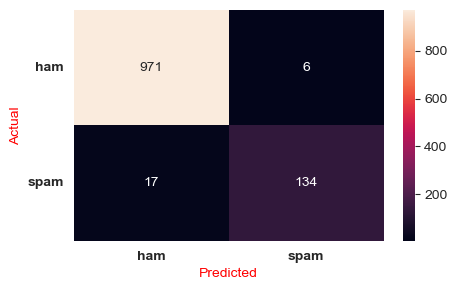

In [1161]:
labels = list(spam1.Class.unique())
cm =pd.DataFrame(confusion_matrix(y_true =y_test,y_pred =y_pred))
fig,ax =plt.subplots(figsize =(5,3))
sns.heatmap(cm,annot =True ,fmt ='0.0f',ax =ax)
ax.set_xlabel('Predicted',color ='red',size =10)
ax.set_ylabel('Actual',color ='red',size =10)
ax.xaxis.set_ticklabels(labels,rotation =0,weight ='bold')
ax.yaxis.set_ticklabels(labels,rotation =0,weight ='bold')
plt.show()

### -bi-gram Models 

In [1052]:


clf1 = Pipeline([
    ('vectorizer', CountVectorizer(ngram_range =(1,2))),
    ('nb', MultinomialNB())
])

clf1.fit(X_train, y_train)
y_pred = clf1.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         ham       0.99      0.99      0.99       977
        spam       0.97      0.92      0.94       151

    accuracy                           0.98      1128
   macro avg       0.98      0.96      0.97      1128
weighted avg       0.98      0.98      0.98      1128



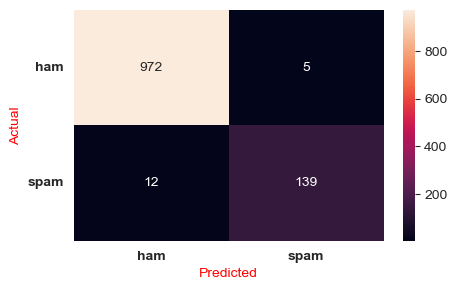

In [1053]:
labels = list(spam1.Class.unique())
cm =pd.DataFrame(confusion_matrix(y_true =y_test,y_pred =y_pred))
fig,ax =plt.subplots(figsize =(5,3))
sns.heatmap(cm,annot =True ,fmt ='d',ax =ax)
ax.set_xlabel('Predicted',color ='red',size =10)
ax.set_ylabel('Actual',color ='red',size =10)
ax.xaxis.set_ticklabels(labels,rotation =0,weight ='bold')
ax.yaxis.set_ticklabels(labels,rotation =0,weight ='bold')
plt.show()